# Exploratory Data Analysis

#### Murilo Menezes Mendonça

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
!ls

database_fires.csv     respostas.csv   _visagio-hackathon_.zip
random_submission.csv  Untitled.ipynb


In [36]:
df = pd.read_csv('database_fires.csv')

In [37]:
df.head()

,id,estado,estacao,data,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,temp_comp_med,umidade_rel_med,vel_vento_med,altitude,fires
0,1,AC,50484,01/01/2016,NaN,31.4,NaN,2.3,NaN,NaN,96.0,0.00000,170.0,0
1,2,AC,50484,02/01/2016,0.0,32.5,23.3,4.4,NaN,26.44,95.0,0.51444,170.0,0
2,3,AC,50484,03/01/2016,35.2,30.5,24.0,0.6,NaN,25.78,97.0,0.51444,170.0,0
3,4,AC,50484,04/01/2016,60.2,31.7,22.3,2.0,NaN,25.94,96.0,0.00000,170.0,0
4,5,AC,50484,05/01/2016,28.4,28.5,23.0,0.1,NaN,25.04,95.0,0.00000,170.0,0


In [38]:
df.shape

(251767, 14)

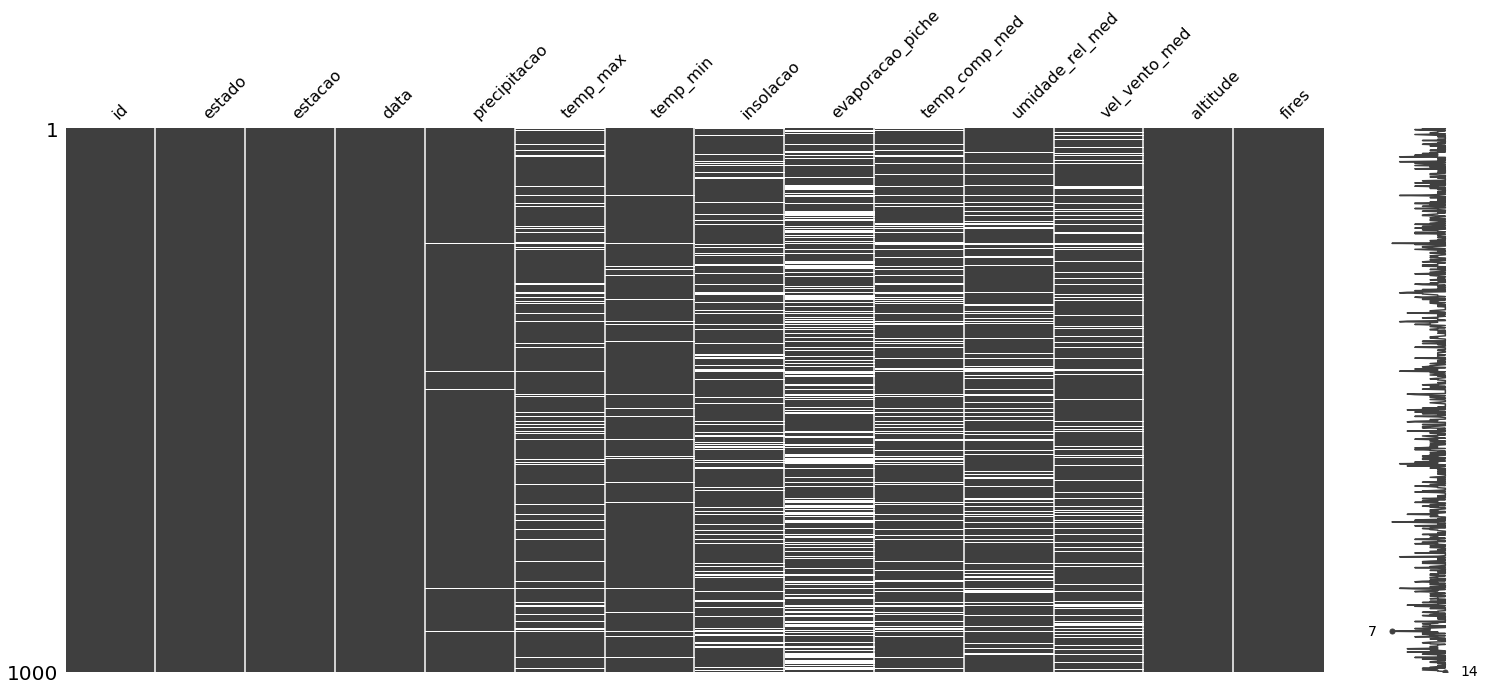

In [39]:
msno.matrix(df.sample(1000))

In [40]:
df['estado'].value_counts()

MG    38599
BA    27608
RS    17311
PA    17004
AM    14005
MA    13333
GO    11713
CE    11647
PI    11145
PE     9033
MT     8733
SP     8544
PR     8438
TO     7436
PB     7307
RN     7232
RJ     6390
AL     5581
SC     4461
SE     3723
AC     2505
MS     2432
RR     2389
ES     2375
DF     1730
AP     1093
Name: estado, dtype: int64

### Quantas regiões aleatórias existem por estado?

In [47]:
lista = []
for name in df['estado'].unique():
    lista.append(len(df[df['estado']==name]['estacao'].value_counts()))
lista

[3,
 5,
 14,
 1,
 26,
 11,
 2,
 2,
 10,
 12,
 38,
 3,
 9,
 15,
 6,
 8,
 11,
 8,
 6,
 7,
 2,
 15,
 8,
 3,
 8,
 6]

### Time range

In [53]:
df['data'] = pd.to_datetime(df['data'], format = '%d/%m/%Y')

In [54]:
df['data'].max() - df['data'].min()

Timedelta('1275 days 00:00:00')

### Precipitação

In [56]:
df['precipitacao'].max()

234.4

In [69]:
df['precipitacao'].min()

0.0

In [59]:
df['mes'] = df['data'].apply(lambda x: x.month)

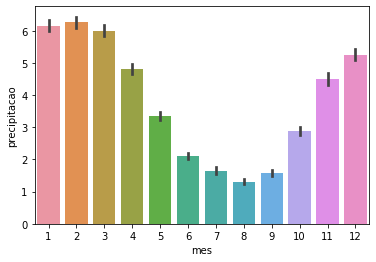

In [71]:
# por mês
sns.barplot(x=df['mes'], y=df['precipitacao'])

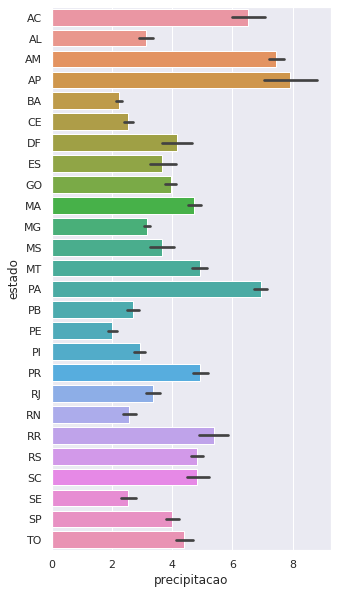

In [84]:
# por estado
sns.set(rc={'figure.figsize':(5,10)})
sns.barplot(x='precipitacao', y='estado', data=df)

### Temperatura

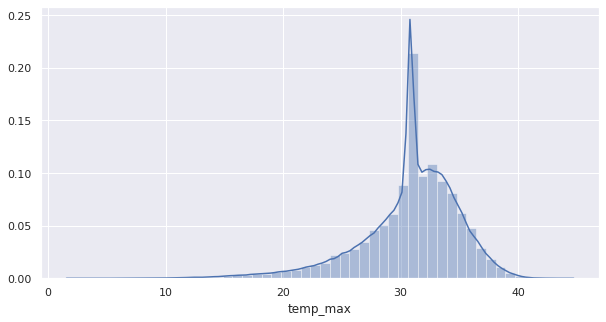

In [87]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df['temp_max'].fillna(df['temp_max'].mean()))

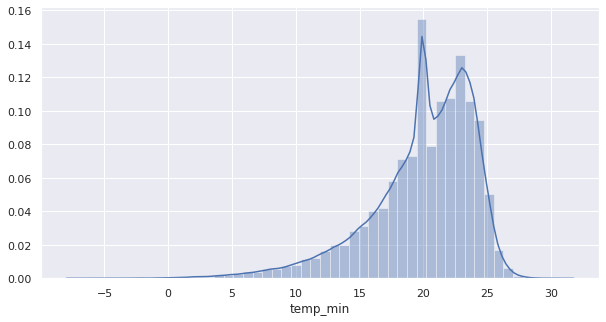

In [93]:
sns.distplot(df['temp_min'].fillna(df['temp_min'].mean()))

Colocar a média não é um bom approach, porque cria um pico desproporcional

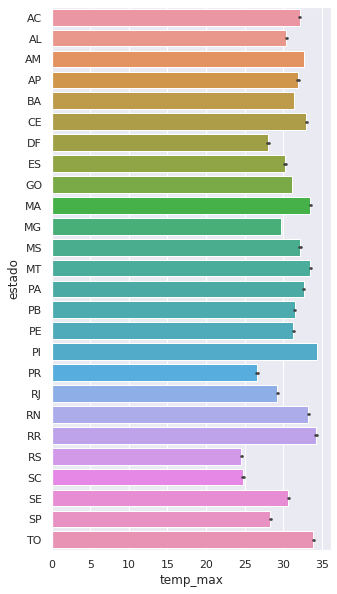

In [94]:
sns.set(rc={'figure.figsize':(5,10)})
sns.barplot(x='temp_max', y='estado', data=df)

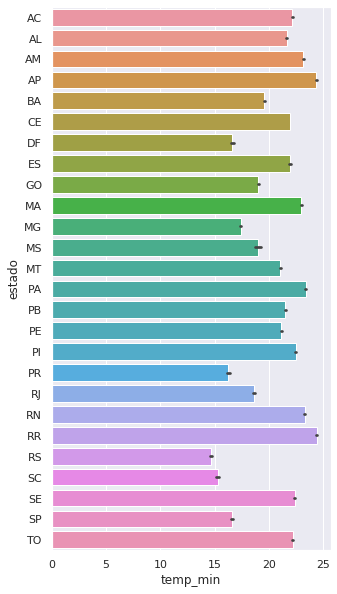

In [95]:
sns.barplot(x='temp_min', y='estado', data=df)

In [96]:
# insolacao = horas de sol sob a superficie
df['insolacao'].describe()

count    211218.000000
mean          6.712716
std           3.412746
min           0.000000
25%           4.200000
50%           7.600000
75%           9.600000
max          14.900000
Name: insolacao, dtype: float64

**A principio percebe-se que no meio do ano existe uma insolação maior**

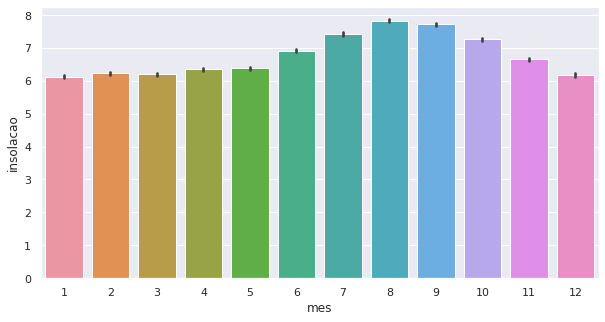

In [101]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='mes', y='insolacao', data=df)

**Mas talvez isso não seja verdadeiro para todos os estados**

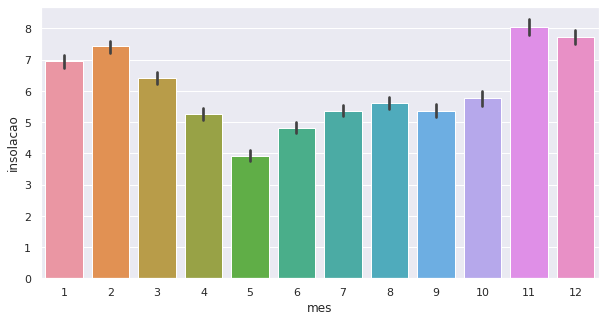

In [103]:
sns.barplot(x='mes', y='insolacao', data=df[df['estado']=='RS'])

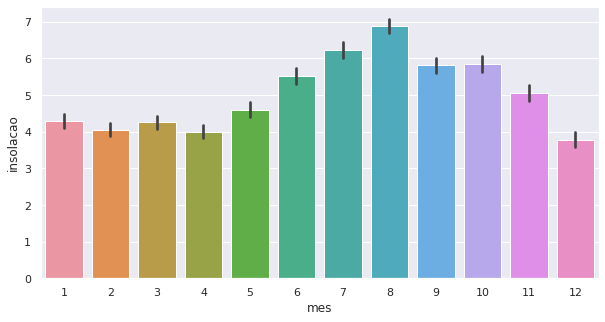

In [104]:
sns.barplot(x='mes', y='insolacao', data=df[df['estado']=='AM'])

### Evaporacao piche [mm]

In [108]:
df['evaporacao_piche'].describe()

count    178196.000000
mean          4.582231
std           3.451342
min           0.000000
25%           2.100000
50%           3.600000
75%           6.000000
max          28.800000
Name: evaporacao_piche, dtype: float64

**Não entendi sobre o que se trata essa variável**

### Umidade relativa média [%]

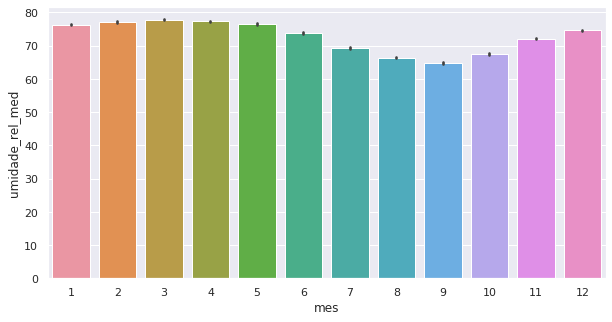

In [109]:
sns.barplot(x='mes', y='umidade_rel_med', data=df)

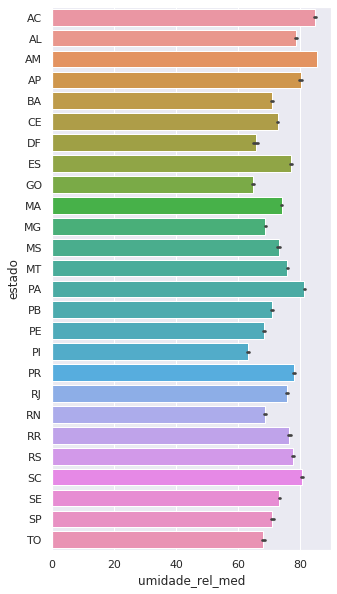

In [110]:
sns.set(rc={'figure.figsize':(5,10)})
sns.barplot(x='umidade_rel_med', y='estado', data=df)

### Velocidade Média do Vento

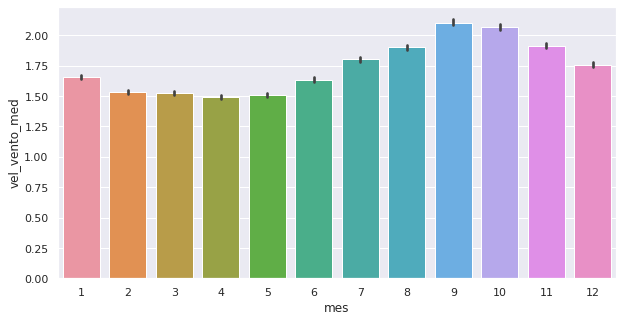

In [113]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='mes', y='vel_vento_med', data=df)

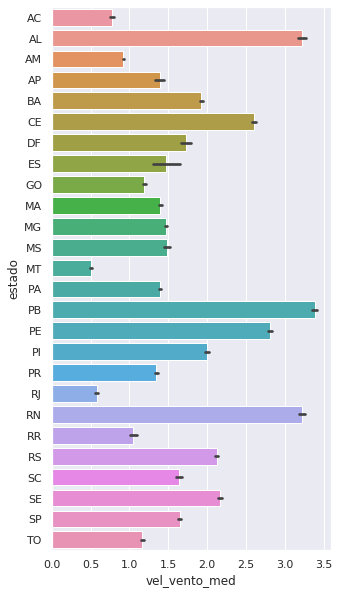

In [111]:
sns.set(rc={'figure.figsize':(5,10)})
sns.barplot(x='vel_vento_med', y='estado', data=df)

## Tentativa com Modelo simples

In [128]:
df['temp_max'] = df['temp_max'].fillna(df['temp_max'].mean())
df['temp_min'] = df['temp_min'].fillna(df['temp_min'].mean())
df['insolacao'] = df['insolacao'].fillna(df['insolacao'].median())
df['precipitacao'] = df['precipitacao'].fillna(0.0)
df['evaporacao_piche'] = df['evaporacao_piche'].fillna(0.0)

In [129]:
df['temp_comp_med'] = df['temp_comp_med'].fillna(df['temp_comp_med'].mean())
df['umidade_rel_med'] = df['umidade_rel_med'].fillna(df['umidade_rel_med'].mean())
df['vel_vento_med'] = df['vel_vento_med'].fillna(df['vel_vento_med'].mean())

In [130]:
df.head()

,id,estado,estacao,data,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,temp_comp_med,umidade_rel_med,vel_vento_med,altitude,fires,mes
0,1,AC,50484,2016-01-01,0.0,31.4,19.9359,2.3,0.0,24.68907,96.0,0.00000,170.0,0,1
1,2,AC,50484,2016-01-02,0.0,32.5,23.3000,4.4,0.0,26.44000,95.0,0.51444,170.0,0,1
2,3,AC,50484,2016-01-03,35.2,30.5,24.0000,0.6,0.0,25.78000,97.0,0.51444,170.0,0,1
3,4,AC,50484,2016-01-04,60.2,31.7,22.3000,2.0,0.0,25.94000,96.0,0.00000,170.0,0,1
4,5,AC,50484,2016-01-05,28.4,28.5,23.0000,0.1,0.0,25.04000,95.0,0.00000,170.0,0,1


In [131]:
df_sem_dummy = pd.get_dummies(df.drop(['id','estacao'], axis=1), drop_first=True)

In [132]:
df_sem_dummy.head()

,data,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,temp_comp_med,umidade_rel_med,vel_vento_med,altitude,...,estado_PI,estado_PR,estado_RJ,estado_RN,estado_RR,estado_RS,estado_SC,estado_SE,estado_SP,estado_TO
0,2016-01-01,0.0,31.4,19.9359,2.3,0.0,24.68907,96.0,0.00000,170.0,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,0.0,32.5,23.3000,4.4,0.0,26.44000,95.0,0.51444,170.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,35.2,30.5,24.0000,0.6,0.0,25.78000,97.0,0.51444,170.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,60.2,31.7,22.3000,2.0,0.0,25.94000,96.0,0.00000,170.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,28.4,28.5,23.0000,0.1,0.0,25.04000,95.0,0.00000,170.0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
X = df_sem_dummy.drop(['fires','data'], axis=1)
y = df_sem_dummy['fires']

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [136]:
clf = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

/home/murilomen/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [137]:
y_pred = clf.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7745775359876751

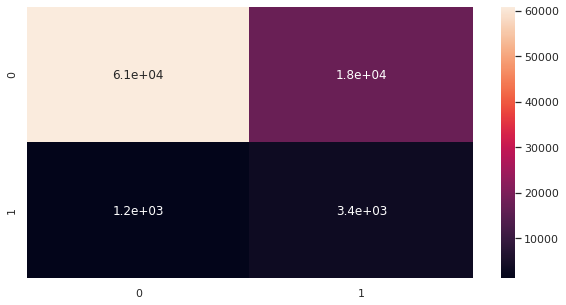

In [141]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True)

## To-do

[x] Incluir data com meses do ano

[ ] Balancear variavel resposta

[ ] Tentar incluir estacao

[ ] Tratar NaNs de uma forma melhor

[ ] Diminuir granularidade de estados para regioes

[ ] Diminuir granularidade de meses para estações